In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,7)


In [2]:
df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [9]:
df['released'][1]

'July 2, 1980 (United States)'

In [10]:
date = df['released'][1].split('(')[0]
country = df['released'][1].split('(')[1]

In [11]:
date.rstrip()

'July 2, 1980'

In [12]:
country.rstrip(country[-1])

'United States'

In [13]:
df['date'] = df['released'].apply(lambda s: s.split('(')[0].rstrip())
df['date']

0           June 13, 1980
1            July 2, 1980
2           June 20, 1980
3            July 2, 1980
4           July 25, 1980
              ...        
7648     January 17, 2020
7649    February 14, 2020
7650     January 17, 2020
7651    February 21, 2020
7652      August 28, 2020
Name: date, Length: 5421, dtype: object

In [14]:
df['country'] = df['released'].apply(lambda s: s.split('(')[1].rstrip(s[-1]))
df['country']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
7648    United States
7649    United States
7650    United States
7651    United States
7652    United States
Name: country, Length: 5421, dtype: object

In [15]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [16]:
df['date'] = pd.to_datetime(df['date'],format='mixed')

df['yearReleased'] = df['date'].dt.year

In [17]:
df['compareResult'] = np.where(df['year'] != df['yearReleased'],1,0)

In [18]:
df['compareResult'].sum()

708

In [19]:
df = df.drop(['year', 'compareResult'],axis =1)
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearReleased
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,United States,135000000,111105497,20th Century Studios,100.0,2020-02-21,2020


<Axes: >

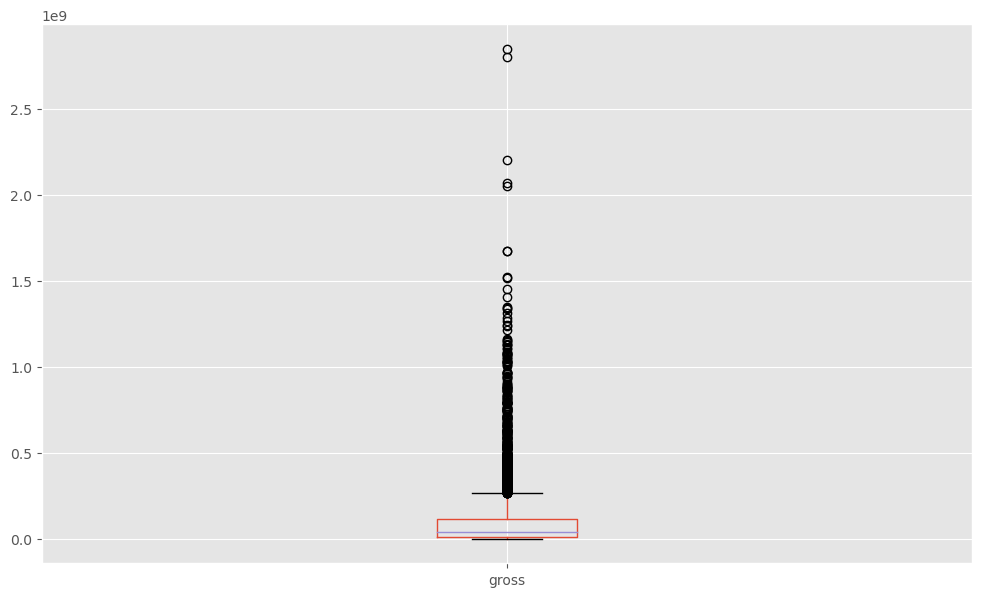

In [20]:
df.boxplot('gross')

In [21]:
df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearReleased
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,United States,135000000,111105497,20th Century Studios,100.0,2020-02-21,2020


In [22]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearReleased
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,Sweden,3000000,5073,Two Prong Lesson,96.0,2015-01-15,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,South Korea,5000000,2970,Trimark Pictures,97.0,1994-06-04,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001-05-11,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982-03-12,1982


In [23]:
df['star'].value_counts()

star
Nicolas Cage       40
Tom Hanks          38
Robert De Niro     38
Bruce Willis       34
Tom Cruise         33
                   ..
Robin Shou          1
Mira Sorvino        1
Djimon Hounsou      1
Stephen Fry         1
Zhi-zhong Huang     1
Name: count, Length: 1845, dtype: int64

[Text(0.5, 1.0, 'Budget Vs Gross'),
 Text(0.5, 0, 'Budget'),
 Text(0, 0.5, 'Gross')]

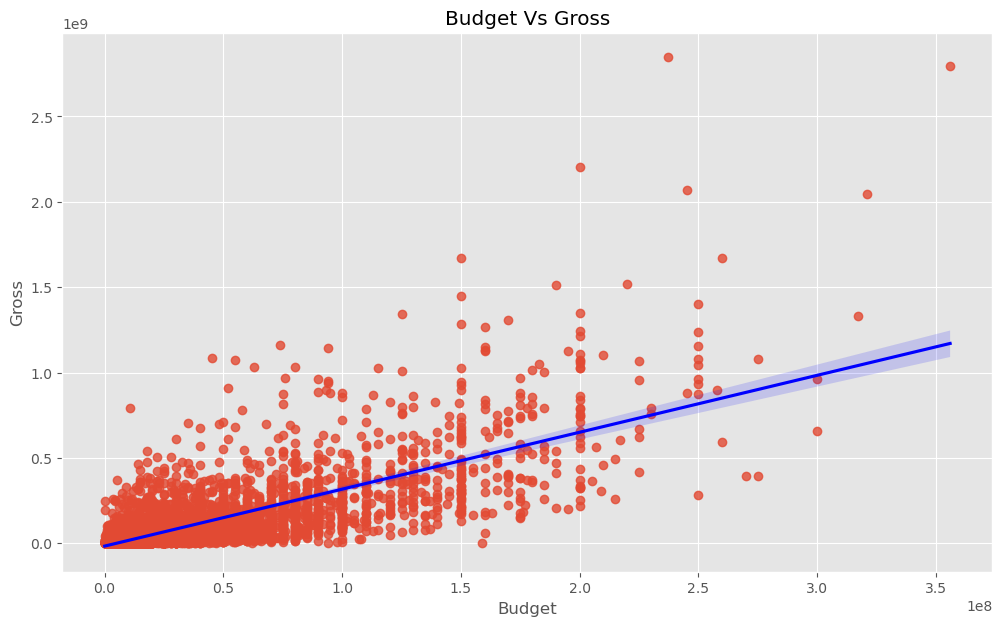

In [24]:
sns.regplot(x='budget', y ='gross',data = df,line_kws = {"color":"blue"}).set(title = 'Budget Vs Gross', xlabel = 'Budget', ylabel = 'Gross')

In [25]:
df.corr(numeric_only = True)

,score,votes,budget,gross,runtime,yearReleased
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearReleased,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<Axes: >

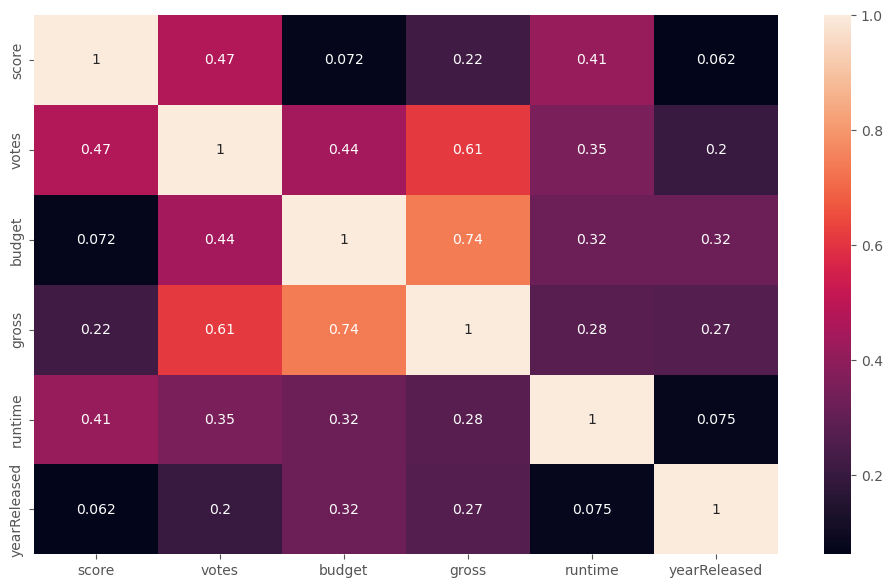

In [26]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

In [27]:
df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearReleased
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980


In [28]:
import category_encoders  as ce 
encoder = ce.BaseNEncoder(cols = ['genre','rating','director','writer','star','country'], return_df = True,base = 10)
df_encoded = encoder.fit_transform(df)


<Axes: >

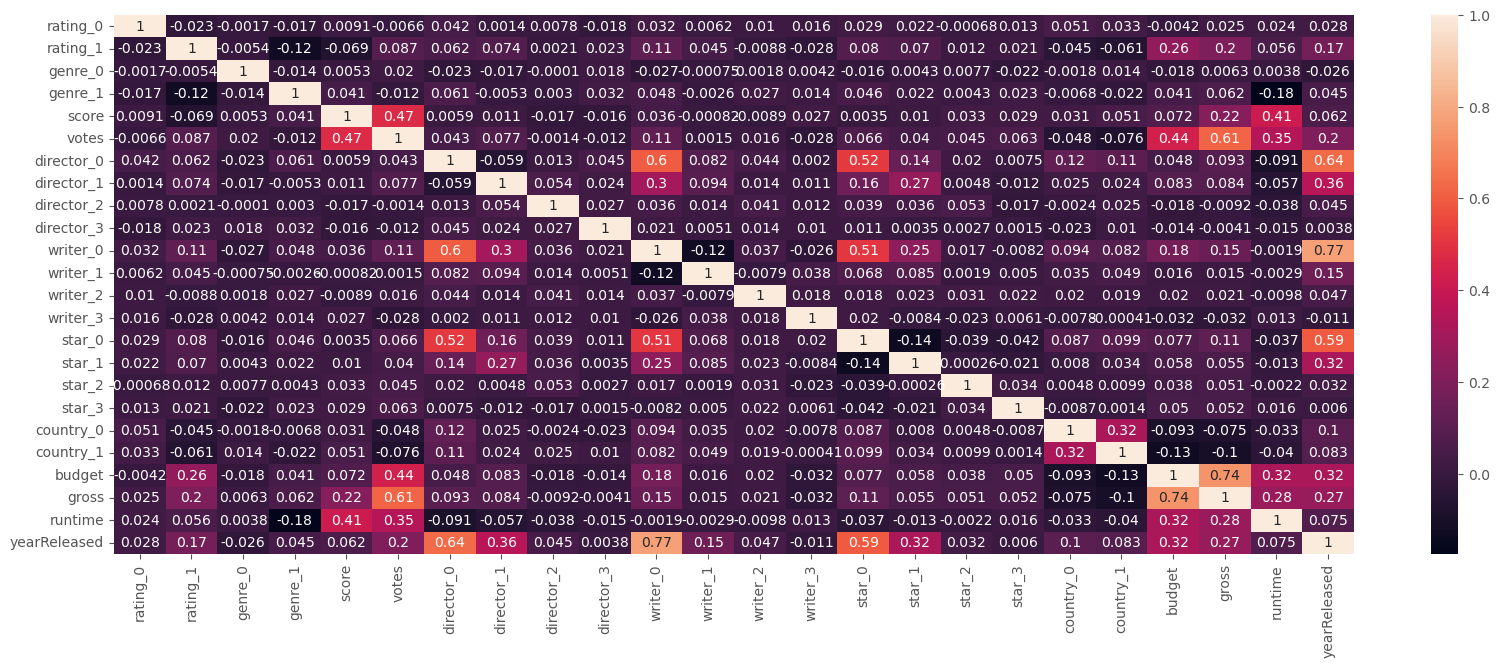

In [29]:
matplotlib.rcParams['figure.figsize'] = (20,7)
sns.heatmap(df_encoded.corr(numeric_only = True), annot=True)

In [31]:
df_sorted = df_encoded.corr(numeric_only = True).unstack().sort_values()
df_sorted


runtime       genre_1        -0.175525
genre_1       runtime        -0.175525
star_0        star_1         -0.135939
star_1        star_0         -0.135939
budget        country_1      -0.128430
                                ...   
country_0     country_0       1.000000
country_1     country_1       1.000000
budget        budget          1.000000
writer_1      writer_1        1.000000
yearReleased  yearReleased    1.000000
Length: 576, dtype: float64

In [33]:
df_sorted[df_sorted>0.7]

budget        gross           0.740247
gross         budget          0.740247
writer_0      yearReleased    0.773785
yearReleased  writer_0        0.773785
rating_0      rating_0        1.000000
gross         gross           1.000000
rating_1      rating_1        1.000000
genre_0       genre_0         1.000000
genre_1       genre_1         1.000000
score         score           1.000000
votes         votes           1.000000
director_0    director_0      1.000000
director_1    director_1      1.000000
director_2    director_2      1.000000
director_3    director_3      1.000000
runtime       runtime         1.000000
writer_0      writer_0        1.000000
writer_2      writer_2        1.000000
writer_3      writer_3        1.000000
star_0        star_0          1.000000
star_1        star_1          1.000000
star_2        star_2          1.000000
star_3        star_3          1.000000
country_0     country_0       1.000000
country_1     country_1       1.000000
budget        budget     